In [7]:
#Exploratory Data Analysis (EDA):

#Load the dataset into a pandas DataFrame.

import pandas as pd

# Specify the file path
file_path = '/content/housing_price_dataset.csv'  # Change this to your actual file name

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.2836
1,2459,3,2,Rural,1980,195014.2216
2,1860,2,1,Suburb,1970,306891.0121
3,2294,2,1,Urban,1996,206786.7872
4,2130,5,2,Suburb,2001,272436.2391


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49899 entries, 0 to 49898
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    49899 non-null  int64  
 1   Bedrooms      49899 non-null  int64  
 2   Bathrooms     49899 non-null  int64  
 3   Neighborhood  49899 non-null  object 
 4   YearBuilt     49899 non-null  int64  
 5   Price         49899 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB

Summary Statistics:
         SquareFeet      Bedrooms     Bathrooms     YearBuilt          Price
count  49899.000000  49899.000000  49899.000000  49899.000000   49899.000000
mean    2006.291809      3.498206      1.995090   1985.407483  224805.128138
std      575.496744      1.116331      0.815839     20.716125   76117.961956
min     1000.000000      2.000000      1.000000   1950.000000  -36588.165400
25%     1512.500000      3.000000      1.000000   1967.000000  169

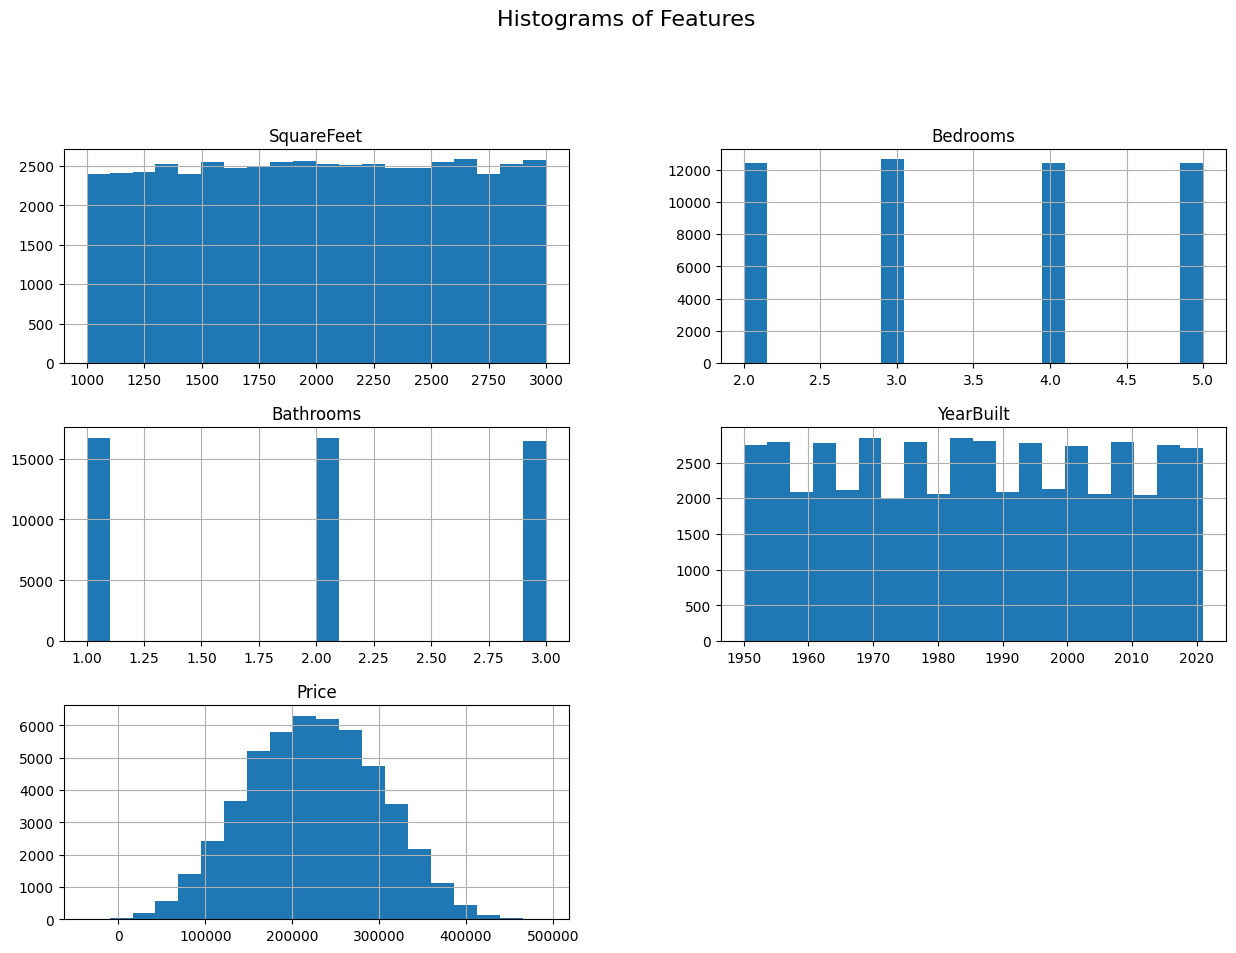

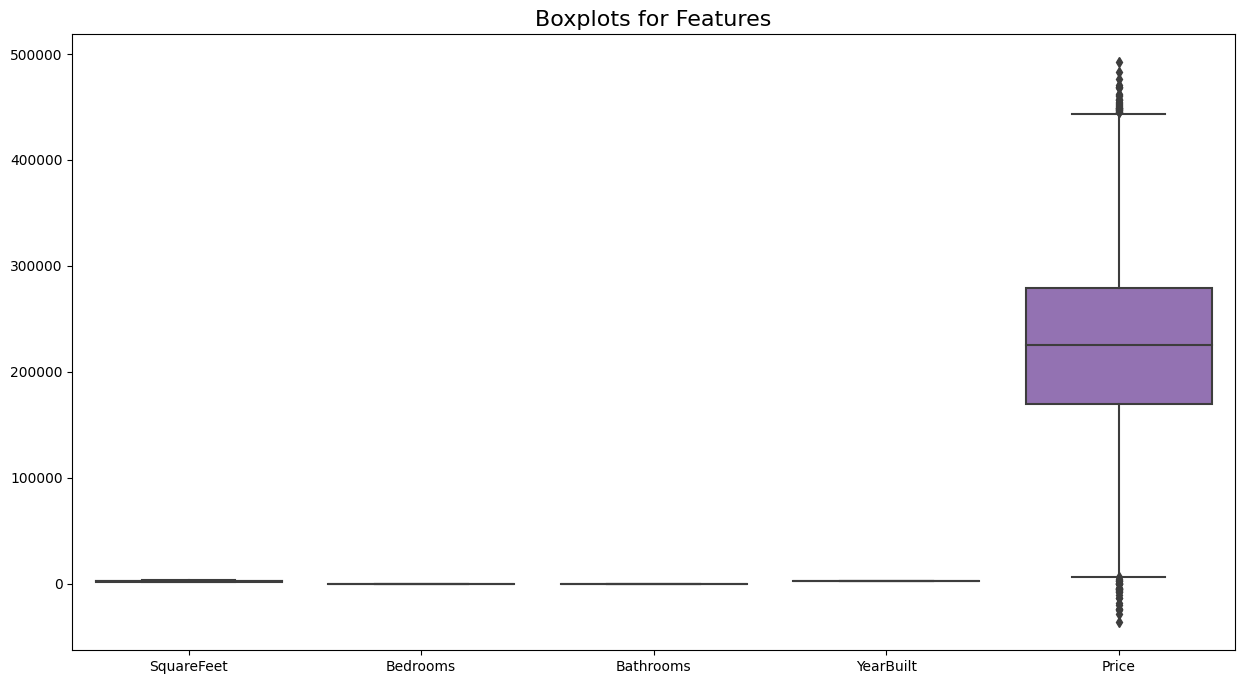

<ipython-input-8-2e532ffd04bb>:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


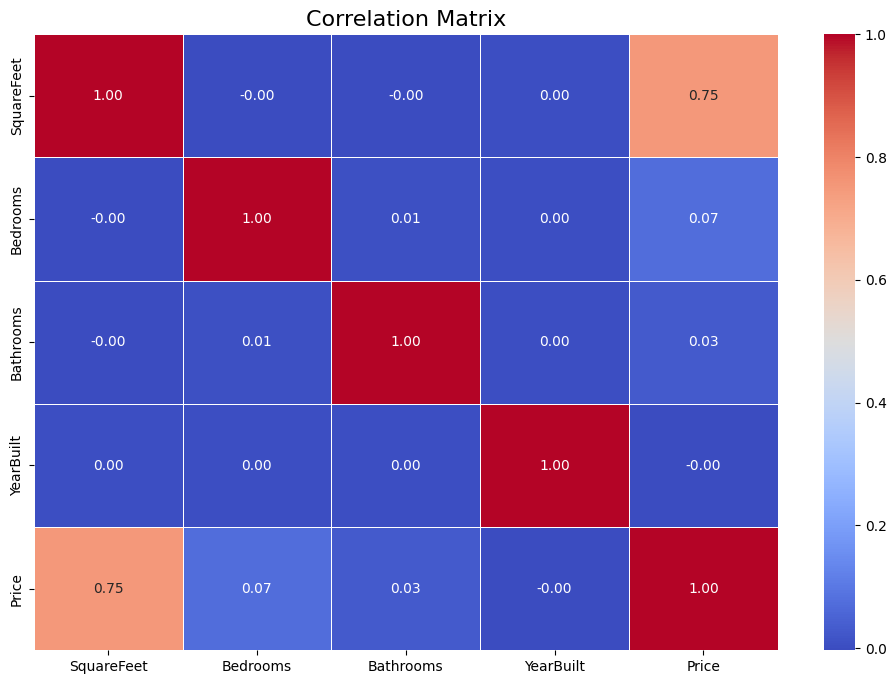

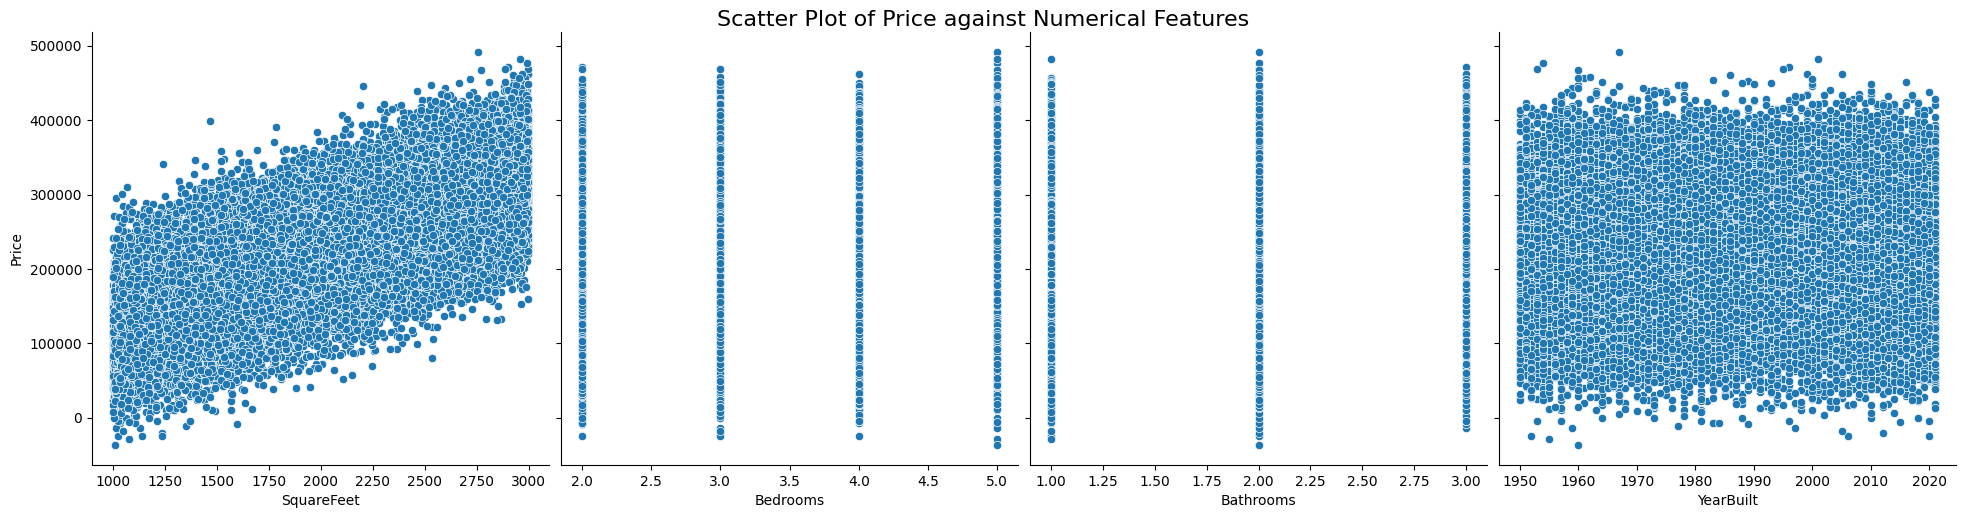

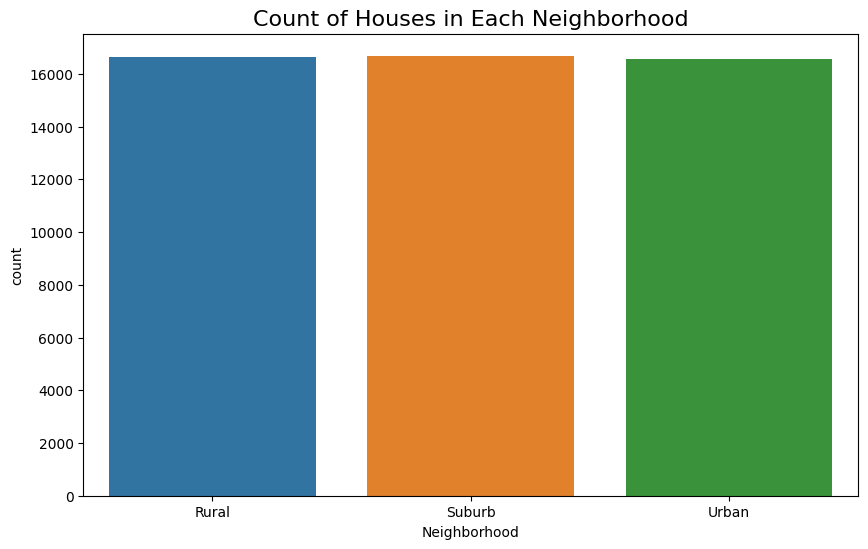

In [8]:
#Displaying Basic Statistics
# Display basic information about the dataset
import matplotlib.pyplot as plt  # Import matplotlib
import seaborn as sns  # Import seaborn
print("Dataset Info:")
df.info()

# Display summary statistics
print("\nSummary Statistics:")
summary_stats = df.describe()
print(summary_stats)

# Display missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values)

# Histograms for each feature
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Features", y=1.02, fontsize=16)
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, orient="v")
plt.title("Boxplots for Features", fontsize=16)
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

# Scatter plot of Price against other numerical features
sns.pairplot(df, x_vars=['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt'], y_vars=['Price'], height=5)
plt.suptitle("Scatter Plot of Price against Numerical Features", y=1.02, fontsize=16)
plt.show()

# Bar plot for categorical feature (Neighborhood)
plt.figure(figsize=(10, 6))
sns.countplot(x='Neighborhood', data=df)
plt.title("Count of Houses in Each Neighborhood", fontsize=16)
plt.show()


In [9]:
#Handling missing values
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

# Handle missing values
# For demonstration purposes, let's assume you want to impute missing values with the mean for numerical columns
# and fill categorical columns with the most frequent value

# Impute missing values for numerical columns
numerical_cols = df.select_dtypes(include='number').columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Impute missing values for categorical columns
categorical_cols = df.select_dtypes(exclude='number').columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify that there are no more missing values
updated_missing_values = df.isnull().sum()
print("\nColumns with Missing Values After Imputation:")
print(updated_missing_values[updated_missing_values > 0])


Columns with Missing Values:
Series([], dtype: int64)

Columns with Missing Values After Imputation:
Series([], dtype: int64)


In [10]:
#Converting Categorial values
# Assuming 'Neighborhood' is a categorical variable in your DataFrame 'df'
# If not, replace 'Neighborhood' with the actual column name

# Display unique values in the 'Neighborhood' column before mapping
print("Unique Values in 'Neighborhood' before Mapping:")
print(df['Neighborhood'].unique())

# Map values to numerical representations
neighborhood_mapping = {'Rural': 1, 'Suburb': 2, 'Urban': 3}
df['Neighborhood'] = df['Neighborhood'].map(neighborhood_mapping)

# Display unique values in the 'Neighborhood' column after mapping
print("\nUnique Values in 'Neighborhood' after Mapping:")
print(df['Neighborhood'].unique())



Unique Values in 'Neighborhood' before Mapping:
['Rural' 'Suburb' 'Urban']

Unique Values in 'Neighborhood' after Mapping:
[1 2 3]


In [11]:
#Standardize or normalize numerical features
#Identify and create new features

#Identify and create new features

# Assuming 'YearBuilt' is a numerical feature in your DataFrame 'df'
# If not, replace 'YearBuilt' with the actual column name

# Calculate the age of the property
current_year = 2023  # Update with the current year
df['Age'] = current_year - df['YearBuilt']

# Display the first few rows of the DataFrame with the new 'Age' feature
print("DataFrame with the 'Age' Feature:")
print(df.head())


from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming you have numerical features in your DataFrame 'df' that you want to standardize or normalize
# Replace 'SquareFeet', 'Bedrooms', 'Bathrooms', and 'YearBuilt' with the actual numerical columns

# Standardize numerical features using StandardScaler
scaler_standard = StandardScaler()
df[['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']] = scaler_standard.fit_transform(df[['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']])

# Display the first few rows of the DataFrame after standardization
print("DataFrame after Standardization:")
print(df.head())

# Normalize numerical features using MinMaxScaler
scaler_minmax = MinMaxScaler()
df[['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']] = scaler_minmax.fit_transform(df[['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']])

# Display the first few rows of the DataFrame after normalization
print("DataFrame after Normalization:")
print(df.head())


DataFrame with the 'Age' Feature:
   SquareFeet  Bedrooms  Bathrooms  Neighborhood  YearBuilt        Price  Age
0        2126         4          1             1       1969  215355.2836   54
1        2459         3          2             1       1980  195014.2216   43
2        1860         2          1             2       1970  306891.0121   53
3        2294         2          1             3       1996  206786.7872   27
4        2130         5          2             2       2001  272436.2391   22
DataFrame after Standardization:
   SquareFeet  Bedrooms  Bathrooms  Neighborhood  YearBuilt        Price  Age
0    0.208011  0.449507  -1.219726             1  -0.792023  215355.2836   54
1    0.786647 -0.446294   0.006018             1  -0.261030  195014.2216   43
2   -0.254203 -1.342095  -1.219726             2  -0.743751  306891.0121   53
3    0.499935 -1.342095  -1.219726             3   0.511323  206786.7872   27
4    0.214961  1.345308   0.006018             2   0.752683  272436.2391   

In [ ]:
# Building model
#Donot run
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'df' is your DataFrame with features and target variable 'Price'
# Replace 'Price' with the actual target variable name

# Split the data into features (X) and the target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base models
linear_model = LinearRegression()
neural_network_model = MLPRegressor(max_iter=1000, random_state=42)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Define the boosting algorithm (AdaBoostRegressor in this case)
boosting_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_estimators=5, random_state=42)

# Train each base model and add it to the boosting model
models = [linear_model, neural_network_model, random_forest_model, gradient_boosting_model, decision_tree_model]
for model in models:
    boosting_model.fit(X_train, y_train)
    models.append(model)

# Make predictions using each model
predictions = [model.predict(X_test) for model in models]

# Combine predictions (e.g., average or weighted average)
ensemble_prediction = np.mean(predictions, axis=0)

# Evaluate the ensemble model
ensemble_mse = mean_squared_error(y_test, ensemble_prediction)
print(f'Ensemble Model Mean Squared Error: {ensemble_mse}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

KeyboardInterrupt: ignored

In [12]:
#Linear Regression Model

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'df' is your DataFrame with features and target variable 'Price'
# Replace 'Price' with the actual target variable name

# Split the data into features (X) and the target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# You can also print the coefficients and intercept if needed
#print('Coefficients:', linear_model.coef_)
#print('Intercept:', linear_model.intercept_)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, r2_score, accuracy_score

# Assuming 'df' is your DataFrame with features and target variable (binary classification)
# Replace 'Target' with the actual target variable name

# Assume binary classification, if not, modify accordingly
df['Target'] = (df['Price'] > df['Price'].mean()).astype(int)

# Split the data into features (X) and the target variable (y)
X = df.drop(['Price', 'Target'], axis=1)  # Exclude 'Price' and 'Target' if they are in your data
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Logistic Regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Calculate F1 Score, R2 Score, and Accuracy
f1 = f1_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Note: R2 Score is not applicable for classification
accuracy = accuracy_score(y_test, y_pred)

print(f'F1 Score: {f1}')
print(f'R2 Score: {r2}')  # Note: R2 Score is not applicable for classification
print(f'Accuracy: {accuracy}')



Mean Squared Error: 2487540876.325218
F1 Score: 0.8025197480251975
R2 Score: 0.20837563121505753
Accuracy: 0.8021042084168337


In [ ]:
#Neural Network Model
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_squared_error, f1_score, r2_score, accuracy_score

# Assuming 'df' is your DataFrame with features and target variable 'Price'
# Replace 'Price' with the actual target variable name

# Regression with MLPRegressor
# Split the data into features (X) and the target variable (y)
X_reg = df.drop('Price', axis=1)
y_reg = df['Price']

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Instantiate the MLPRegressor model
mlp_reg_model = MLPRegressor(max_iter=1000, random_state=42)

# Train the model on the training data
mlp_reg_model.fit(X_train_reg, y_train_reg)

# Make predictions on the test data
y_pred_reg = mlp_reg_model.predict(X_test_reg)

# Evaluate the model using Mean Squared Error (MSE) for regression
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f'Mean Squared Error (Regression): {mse_reg}')

# Classification with MLPClassifier
# Assume binary classification, if not, modify accordingly
df['Target'] = (df['Price'] > df['Price'].mean()).astype(int)

# Split the data into features (X) and the target variable (y) for classification
X_cls = df.drop(['Price', 'Target'], axis=1)
y_cls = df['Target']

# Split the data into training and testing sets for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Instantiate the MLPClassifier model
mlp_cls_model = MLPClassifier(max_iter=1000, random_state=42)

# Train the model on the training data for classification
mlp_cls_model.fit(X_train_cls, y_train_cls)

# Make predictions on the test data for classification
y_pred_cls = mlp_cls_model.predict(X_test_cls)

# Calculate F1 Score, R2 Score, and Accuracy for classification
f1_cls = f1_score(y_test_cls, y_pred_cls)
r2_cls = r2_score(y_test_cls, y_pred_cls)  # Note: R2 Score is not applicable for classification
accuracy_cls = accuracy_score(y_test_cls, y_pred_cls)

print(f'F1 Score (Classification): {f1_cls}')
print(f'R2 Score (Classification): {r2_cls}')  # Note: R2 Score is not applicable for classification
print(f'Accuracy (Classification): {accuracy_cls}')


Mean Squared Error (Regression): 1458054763.091818
F1 Score (Classification): 0.8013509364445809
R2 Score (Classification): 0.2235999689439988
Accuracy (Classification): 0.8059


In [14]:
#Random Forest Model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, f1_score, accuracy_score

# Assuming 'df' is your DataFrame with features and target variable 'Price'
# Replace 'Price' with the actual target variable name

# Split the data into features (X) and the target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model using R-squared (r2_score) and Mean Squared Error (MSE)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# For regression tasks, R-squared is a common metric
print(f'R-squared Score: {r2}')
print(f'Mean Squared Error: {mse}')




R-squared Score: 0.7202761702364859
Mean Squared Error: 1643340669.1541653


In [15]:
#Gradient Boosting Regression
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'df' is your DataFrame with features and target variable 'Price'
# Replace 'Price' with the actual target variable name

# Split the data into features (X) and the target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
gb_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {np.sqrt(mse)}')


# You can also inspect feature importances if needed
#print('Feature Importances:', gb_regressor.feature_importances_)

from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')



Mean Squared Error: 1453079303.6803002
Root Mean Squared Error: 38119.27732368887
R-squared: 0.7526618093223719


In [ ]:
#Bagging Regression Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'df' is your DataFrame with features and target variable 'Price'
# Replace 'Price' with the actual target variable name

# Split the data into features (X) and the target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the base Linear Regression model
base_model = LinearRegression()

# Instantiate the Bagging Regressor with the base model
bagging_model = BaggingRegressor(base_model, n_estimators=10, random_state=42)

# Train the model on the training data
bagging_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bagging_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

# Assuming 'df' is your DataFrame with features and target variable (binary classification)
# Replace 'Target' with the actual target variable name

# Assume binary classification, if not, modify accordingly
df['Target'] = (df['Price'] > df['Price'].mean()).astype(int)

# Split the data into features (X) and the target variable (y)
X = df.drop(['Price', 'Target'], axis=1)  # Exclude 'Price' and 'Target' if they are in your data
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the base Logistic Regression model
base_model = LogisticRegression()

# Instantiate the Bagging Classifier with the base model
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# Train the model on the training data
bagging_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bagging_model.predict(X_test)

# Calculate F1 Score and Accuracy
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')


Mean Squared Error: 1456625239.2494593
F1 Score: 0.8050389922015596
Accuracy: 0.805


In [ ]:
#Decision tree Model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame with features and target variable 'Price'
# Replace 'Price' with the actual target variable name

# Split the data into features (X) and the target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 3063149063.9213967
R-squared: 0.4663460013111852
